In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

### Data

In [3]:
df = pd.read_csv('customer_churn_dataset.csv')

In [4]:
df.shape  # initial shape

(3000, 10)

In [5]:
df.describe(include='all')

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,HasCreditCard,Churn
count,2700.000000,2569,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2560,2565
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,NaN,1293,NaN,NaN,NaN,NaN,NaN,NaN,1286,1316
mean,1509.737037,NaN,43.675926,85137.467037,49.937778,153.754074,15.076667,25.162600,NaN,NaN
std,867.392214,NaN,15.048217,37906.631787,28.607756,84.174308,8.192278,14.381994,NaN,NaN
min,1.000000,NaN,18.000000,20060.000000,1.000000,10.000000,1.000000,0.110000,NaN,NaN
25%,762.750000,NaN,31.000000,51473.750000,25.000000,80.000000,8.000000,12.877500,NaN,NaN
50%,1509.500000,NaN,44.000000,86432.000000,50.000000,151.000000,15.000000,25.425000,NaN,NaN
75%,2260.250000,NaN,57.000000,118539.000000,75.000000,228.000000,22.000000,37.435000,NaN,NaN


In [6]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,HasCreditCard,Churn
0,1.0,Male,NaN,NaN,90.0,17.0,12.0,22.52,No,Yes
1,2.0,Female,19.0,69522.0,98.0,214.0,NaN,21.17,Yes,Yes
2,3.0,Male,23.0,119161.0,30.0,206.0,22.0,NaN,Yes,Yes
3,4.0,Male,45.0,24886.0,NaN,207.0,25.0,18.68,No,No
4,5.0,NaN,46.0,131249.0,60.0,NaN,NaN,5.50,Yes,Yes


In [7]:
target = 'Churn'

In [8]:
df.drop('CustomerID', axis=1, inplace=True)  # Dropping irrelevant features

In [9]:
df.dropna(subset=target, inplace=True)  # Dropping rows with missing target variable

### Missing values

In [10]:
df.isnull().sum()

Gender              373
Age                 259
AnnualIncome        257
SpendingScore       268
TimeSpentInMall     251
VisitsPerMonth      251
DistanceFromHome    254
HasCreditCard       382
Churn                 0
dtype: int64

### Feature Segregation

In [11]:
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'TimeSpentInMall', 'VisitsPerMonth', 'DistanceFromHome']
categorical_columns = ['Gender', 'HasCreditCard']
other_columns = ['CustomerID']

In [12]:
X = df.drop(columns=target)
y = df[target]

In [13]:
from sklearn.model_selection import train_test_split

## Splitting

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
X_train.shape, X_test.shape

((2052, 8), (513, 8))

In [16]:
y_train.shape, y_test.shape

((2052,), (513,))

### Train data

In [17]:
X_train['Gender'].value_counts()

Gender
Female    885
Male      880
Name: count, dtype: int64

In [18]:
X_train['HasCreditCard'].value_counts()

HasCreditCard
No     883
Yes    861
Name: count, dtype: int64

In [19]:
y_train.value_counts()

Churn
No     1053
Yes     999
Name: count, dtype: int64

In [20]:
999/(999+1053)

0.4868421052631579

In [21]:
y_test.value_counts()

Churn
No     263
Yes    250
Name: count, dtype: int64

In [22]:
250/(250+263)

0.4873294346978557

### Imputation

In [23]:
for column in numerical_columns:
    X_train[column] = X_train[column].fillna(X_train[column].median())

In [24]:
for column in categorical_columns:
    X_train[column] = X_train[column].fillna('null')
    X_train[column] = X_train[column].astype('category')

In [25]:
X_train.isnull().sum()  # No missing values 

Gender              0
Age                 0
AnnualIncome        0
SpendingScore       0
TimeSpentInMall     0
VisitsPerMonth      0
DistanceFromHome    0
HasCreditCard       0
dtype: int64

### Encoding

In [26]:
from feature_engine.encoding import OneHotEncoder

In [27]:
ohe = OneHotEncoder(variables=categorical_columns)

In [28]:
ohe.fit(X_train[categorical_columns])

OneHotEncoder(variables=['Gender', 'HasCreditCard'])

In [29]:
cat_columns_train_ohe = ohe.transform(X_train[categorical_columns])

In [30]:
X_train[categorical_columns]

,Gender,HasCreditCard
777,Female,Yes
1161,null,Yes
298,Male,No
1846,Female,Yes
2600,Female,null
...,...,...
550,Male,null
928,null,Yes
984,null,null
2267,Female,Yes


### Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
min_max_scaler = MinMaxScaler()

In [33]:
min_max_scaler.fit(X_train[numerical_columns])

MinMaxScaler()

In [34]:
X_train[numerical_columns] = min_max_scaler.transform(X_train[numerical_columns])

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
standard_scaler = StandardScaler()

In [37]:
standard_scaler.fit(X_train[numerical_columns])

StandardScaler()

In [38]:
X_train[numerical_columns] = standard_scaler.transform(X_train[numerical_columns])

In [39]:
X_train.describe(include='all')

,Gender,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,HasCreditCard
count,2052,2.052000e+03,2.052000e+03,2.052000e+03,2.052000e+03,2.052000e+03,2.052000e+03,2052
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Female,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,885,NaN,NaN,NaN,NaN,NaN,NaN,883
mean,NaN,1.402387e-16,5.453727e-17,5.540294e-17,-1.523581e-16,2.272386e-16,2.770147e-16,NaN
std,NaN,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,1.000244e+00,NaN
min,NaN,-1.829646e+00,-1.796077e+00,-1.763612e+00,-1.789724e+00,-1.800049e+00,-1.846292e+00,NaN
25%,NaN,-7.682919e-01,-8.498133e-01,-8.512884e-01,-8.349114e-01,-7.766152e-01,-8.128721e-01,NaN
50%,NaN,1.003424e-02,2.381239e-02,-1.195090e-02,-3.560593e-02,-9.039833e-03,3.085209e-02,NaN
75%,NaN,7.883604e-01,8.496950e-01,8.273866e-01,8.601138e-01,7.585355e-01,8.263268e-01,NaN


In [40]:
X_train

,Gender,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,HasCreditCard
777,Female,-1.475861,1.106122,-1.143232,1.743393,1.654040,1.809663,Yes
1161,null,0.010034,-1.021681,1.119330,-1.578234,1.398182,0.030852,Yes
298,Male,-1.405104,-1.046804,1.301795,-1.627997,-0.392828,0.545269,No
1846,Female,1.212902,0.486737,0.316486,0.785470,-0.264898,1.303318,Yes
2600,Female,1.637443,-1.554997,0.207007,-0.794480,-0.009040,0.190828,null
...,...,...,...,...,...,...,...,...
550,Male,0.929874,1.063432,1.776203,0.860114,-0.009040,0.479958,null
928,null,-0.414507,1.369595,0.352978,-1.329423,-1.672120,-0.377893,Yes
984,null,0.929874,-1.318247,-1.617640,-0.271976,0.758536,-1.127870,null
2267,Female,-1.688132,0.054437,-1.398682,1.084044,0.374748,1.548418,Yes


In [41]:
X_train.drop(columns=categorical_columns, inplace=True)

In [42]:
X_train = pd.concat((X_train, cat_columns_train_ohe), axis=1)

In [43]:
X_train  # Final train data

,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,Gender_Female,Gender_null,Gender_Male,HasCreditCard_Yes,HasCreditCard_No,HasCreditCard_null
777,-1.475861,1.106122,-1.143232,1.743393,1.654040,1.809663,1,0,0,1,0,0
1161,0.010034,-1.021681,1.119330,-1.578234,1.398182,0.030852,0,1,0,1,0,0
298,-1.405104,-1.046804,1.301795,-1.627997,-0.392828,0.545269,0,0,1,0,1,0
1846,1.212902,0.486737,0.316486,0.785470,-0.264898,1.303318,1,0,0,1,0,0
2600,1.637443,-1.554997,0.207007,-0.794480,-0.009040,0.190828,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.929874,1.063432,1.776203,0.860114,-0.009040,0.479958,0,0,1,0,0,1
928,-0.414507,1.369595,0.352978,-1.329423,-1.672120,-0.377893,0,1,0,1,0,0
984,0.929874,-1.318247,-1.617640,-0.271976,0.758536,-1.127870,0,1,0,0,0,1
2267,-1.688132,0.054437,-1.398682,1.084044,0.374748,1.548418,1,0,0,1,0,0


In [44]:
X_train.columns

Index(['Age', 'AnnualIncome', 'SpendingScore', 'TimeSpentInMall',
       'VisitsPerMonth', 'DistanceFromHome', 'Gender_Female', 'Gender_null',
       'Gender_Male', 'HasCreditCard_Yes', 'HasCreditCard_No',
       'HasCreditCard_null'],
      dtype='object')

In [45]:
y_train = y_train.map({'Yes': 1, 'No': 0})  # Converting to int 

### Test data

In [46]:
X_test['Gender'].value_counts()

Gender
Male      214
Female    213
Name: count, dtype: int64

In [47]:
X_test['HasCreditCard'].value_counts()

HasCreditCard
Yes    222
No     217
Name: count, dtype: int64

In [48]:
y_test.value_counts()

Churn
No     263
Yes    250
Name: count, dtype: int64

### Imputation

In [49]:
for column in numerical_columns:
    X_test[column] = X_test[column].fillna(X_test[column].median())

In [50]:
for column in categorical_columns:
    X_test[column] = X_test[column].fillna('null')
    X_test[column] = X_test[column].astype('category')

In [51]:
X_test.isnull().sum()

Gender              0
Age                 0
AnnualIncome        0
SpendingScore       0
TimeSpentInMall     0
VisitsPerMonth      0
DistanceFromHome    0
HasCreditCard       0
dtype: int64

### Encoding

In [52]:
cat_columns_test_ohe = ohe.transform(X_test[categorical_columns])

In [53]:
X_test[categorical_columns]

,Gender,HasCreditCard
2405,null,null
2572,null,Yes
1097,Female,Yes
2327,null,No
1916,Female,Yes
...,...,...
386,Male,No
1732,Male,No
2592,Male,No
2576,Male,No


### Scaling

In [54]:
X_test[numerical_columns] = min_max_scaler.transform(X_test[numerical_columns])

In [55]:
X_test[numerical_columns] = standard_scaler.transform(X_test[numerical_columns])

In [56]:
X_test.drop(columns=categorical_columns, inplace=True)

In [57]:
X_test = pd.concat((X_test, cat_columns_test_ohe), axis=1)

In [58]:
X_test.columns

Index(['Age', 'AnnualIncome', 'SpendingScore', 'TimeSpentInMall',
       'VisitsPerMonth', 'DistanceFromHome', 'Gender_Female', 'Gender_null',
       'Gender_Male', 'HasCreditCard_Yes', 'HasCreditCard_No',
       'HasCreditCard_null'],
      dtype='object')

In [59]:
X_test  # Final test data

,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,Gender_Female,Gender_null,Gender_Male,HasCreditCard_Yes,HasCreditCard_No,HasCreditCard_null
2405,-0.909806,0.667258,-0.668824,0.070139,1.398182,-1.747958,0,1,0,0,0,1
2572,0.505333,-0.393886,0.754401,-1.565794,0.886465,-1.671640,0,1,0,1,0,0
1097,0.576090,0.360737,0.316486,-0.097809,0.246819,-0.066748,1,0,0,1,0,0
2327,-0.414507,-0.767888,0.827387,0.884995,-0.904544,-1.557162,0,1,0,0,1,0
1916,-0.980563,-1.629814,-0.157923,-0.371501,-1.032474,1.330470,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.859117,0.049294,-0.084937,1.108925,0.118889,-0.752147,0,0,1,0,1,0
1732,0.505333,0.049294,-0.668824,-1.018410,1.654040,-0.273688,0,0,1,0,1,0
2592,1.071388,-1.475216,0.571936,1.482141,1.398182,-0.020516,0,0,1,0,1,0
2576,0.080791,-1.228235,1.557245,0.070139,-0.520757,-1.767772,0,0,1,0,1,0


In [60]:
y_test = y_test.map({'Yes': 1, 'No': 0})  # Converting to int

## Model

In [61]:
import numpy as np

In [62]:
def relu(Z):
    return np.maximum(0,Z)

In [63]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [64]:
np.random.seed(42)
weights = np.random.rand(X_train.shape[1])
biases = np.random.randn()

In [65]:
def forward_propagation(X, W, b, activation):
    Z = np.dot(X, W) + b
    if activation == 'relu':
        A = relu(Z)
    elif activation == 'sigmoid':
        A = sigmoid(Z)
    return A

In [66]:
def compute_cost(A, Y):
    m = Y.shape[0]
    A = np.clip(A, 1e-10, 1 - 1e-10)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

In [67]:
def backward_propagation(X, Y, A):
    m = X.shape[0]
    dZ = A - Y
    dW = (1/m) * np.dot(X.T, dZ)
    db = (1/m) * np.sum(dZ)
    return dW, db

In [68]:
def gradient_descent(weights, biases, dW, dB, learning_rate):
    # print(f"weights shape: {weights.shape}, dW shape: {dW.shape}")
    # print(f"biases shape: {biases.shape}, dB shape: {dB.shape}")
    weights -= learning_rate * dW
    biases -= learning_rate * dB
    return weights, biases

In [69]:
def train_model(X, Y, num_iterations, learning_rate, activation):
    np.random.seed(1)
    W = np.random.rand(X.shape[1])
    b = np.random.randn()
    costs = []

    for i in range(num_iterations):
        A = forward_propagation(X, W, b, activation)
        cost = compute_cost(A, Y)
        dW, db = backward_propagation(X, Y, A)
        W, b = gradient_descent(W, b, dW, db, learning_rate)
        
        if i % 50 == 0:
            print(f"Epoch {i}: Loss = {cost}")
            costs.append(cost)

    return W, b, costs

In [70]:
weights, bias, loss_history = train_model(X_train, y_train, 1000, 0.01, 'relu')  # Best learning rate

Epoch 0: Loss = 7.70356136093891
Epoch 50: Loss = 5.531562748550433
Epoch 100: Loss = 3.066460784144813
Epoch 150: Loss = 1.5372755929213446
Epoch 200: Loss = 0.8609010795022484
Epoch 250: Loss = 0.7332598343400186
Epoch 300: Loss = 0.7075133318016282
Epoch 350: Loss = 0.7009038045604775
Epoch 400: Loss = 0.6975662729890839
Epoch 450: Loss = 0.6955690433039221
Epoch 500: Loss = 0.6942122904038058
Epoch 550: Loss = 0.6932112486681452
Epoch 600: Loss = 0.6924359514151166
Epoch 650: Loss = 0.6918188451412856
Epoch 700: Loss = 0.6913199235168042
Epoch 750: Loss = 0.6909127627572103
Epoch 800: Loss = 0.690578496267361
Epoch 850: Loss = 0.690302956393873
Epoch 900: Loss = 0.690075162809118
Epoch 950: Loss = 0.6898864328299404


In [71]:
costs_relu = loss_history

In [72]:
import matplotlib.pyplot as plt

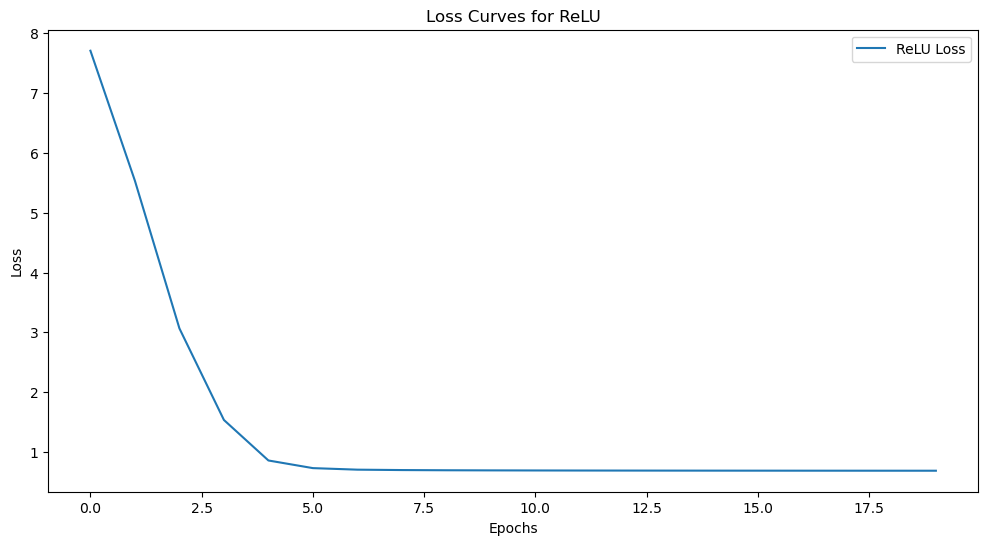

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history, label='ReLU Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for ReLU')
plt.show()

In [74]:
weights, bias, loss_history = train_model(X_train, y_train, 1000, 0.05, 'relu')  # Not better

Epoch 0: Loss = 7.70356136093891
Epoch 50: Loss = 0.7313500839235828
Epoch 100: Loss = 0.6941535920822095
Epoch 150: Loss = 0.6908929064158842
Epoch 200: Loss = 0.6897198862713082
Epoch 250: Loss = 0.6892587413549605
Epoch 300: Loss = 0.6890739001076226
Epoch 350: Loss = 0.6889994709150532
Epoch 400: Loss = 0.6889695447028619
Epoch 450: Loss = 0.6889575814057639
Epoch 500: Loss = 0.6889528519390813
Epoch 550: Loss = 0.688951018978675
Epoch 600: Loss = 0.688950333660782
Epoch 650: Loss = 0.6889500946988422
Epoch 700: Loss = 0.6889500236533863
Epoch 750: Loss = 0.6889500118721167
Epoch 800: Loss = 0.6889500182466571
Epoch 850: Loss = 0.6889500281071577
Epoch 900: Loss = 0.6889500368399399
Epoch 950: Loss = 0.6889500434563602


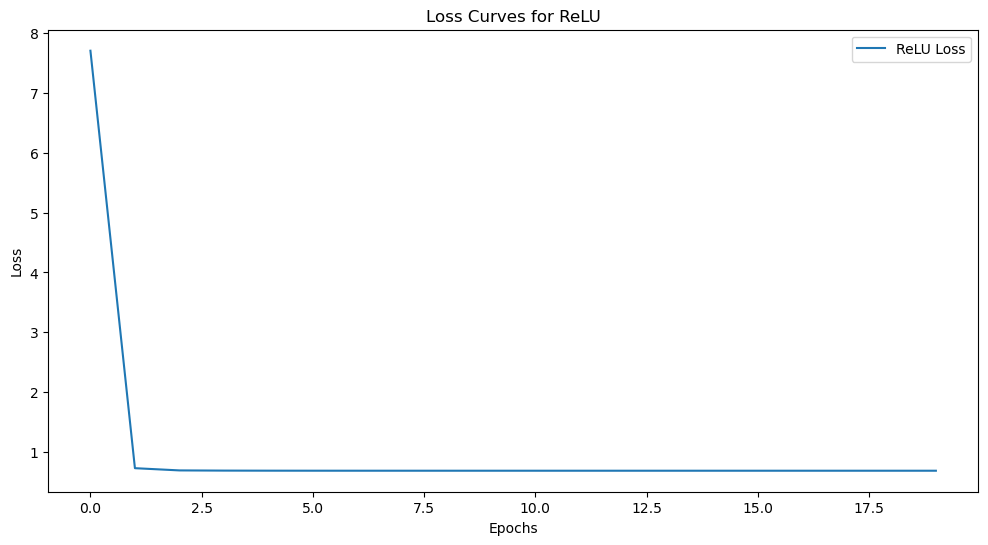

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history, label='ReLU Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for ReLU')
plt.show()

In [76]:
weights, bias, loss_history = train_model(X_train, y_train, 1000, 0.01, 'sigmoid')  # Best learning rate

Epoch 0: Loss = 0.9140273729602608
Epoch 50: Loss = 0.8604233681906458
Epoch 100: Loss = 0.8185405335071222
Epoch 150: Loss = 0.7863556090089018
Epoch 200: Loss = 0.761964098641523
Epoch 250: Loss = 0.743675064674207
Epoch 300: Loss = 0.7300613438121515
Epoch 350: Loss = 0.7199685544798832
Epoch 400: Loss = 0.7124944522569528
Epoch 450: Loss = 0.7069522780374263
Epoch 500: Loss = 0.7028293182767021
Epoch 550: Loss = 0.6997478160328102
Epoch 600: Loss = 0.6974316743070099
Epoch 650: Loss = 0.6956798693603808
Epoch 700: Loss = 0.6943461132984171
Epoch 750: Loss = 0.6933237368206363
Epoch 800: Loss = 0.6925346608724354
Epoch 850: Loss = 0.6919214433021701
Epoch 900: Loss = 0.6914415780628821
Epoch 950: Loss = 0.6910634172606579


In [77]:
costs_sigmoid = loss_history

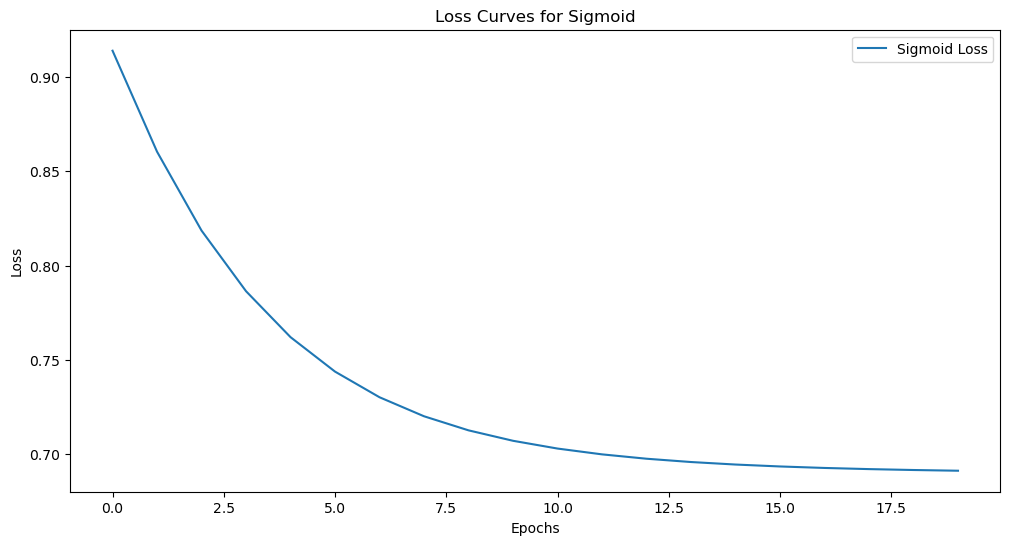

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history, label='Sigmoid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for Sigmoid')
plt.show()

In [79]:
weights, bias, loss_history = train_model(X_train, y_train, 1000, 0.05, 'sigmoid')  # Not better

Epoch 0: Loss = 0.9140273729602608
Epoch 50: Loss = 0.7432954868307023
Epoch 100: Loss = 0.7026666028289553
Epoch 150: Loss = 0.6932681089206278
Epoch 200: Loss = 0.6907436889257266
Epoch 250: Loss = 0.689929872592965
Epoch 300: Loss = 0.6896034426684912
Epoch 350: Loss = 0.6894352066314271
Epoch 400: Loss = 0.6893281690373908
Epoch 450: Loss = 0.6892509769455966
Epoch 500: Loss = 0.6891919179695468
Epoch 550: Loss = 0.6891455797260505
Epoch 600: Loss = 0.6891088334836044
Epoch 650: Loss = 0.6890795551506476
Epoch 700: Loss = 0.6890561724883248
Epoch 750: Loss = 0.6890374741141967
Epoch 800: Loss = 0.6890225096436537
Epoch 850: Loss = 0.6890105270179643
Epoch 900: Loss = 0.6890009284251544
Epoch 950: Loss = 0.6889932374050751


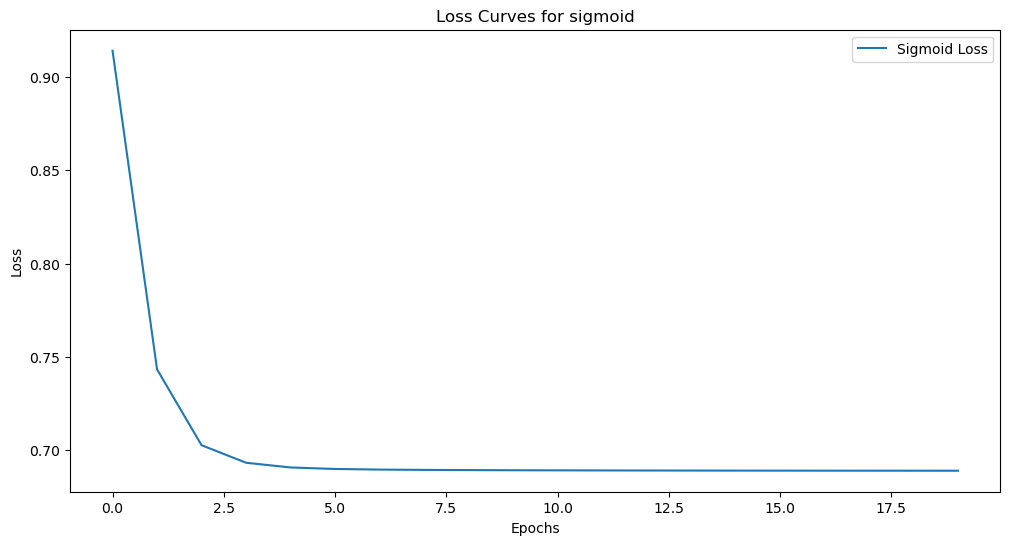

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(loss_history, label='Sigmoid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves for sigmoid')
plt.show()

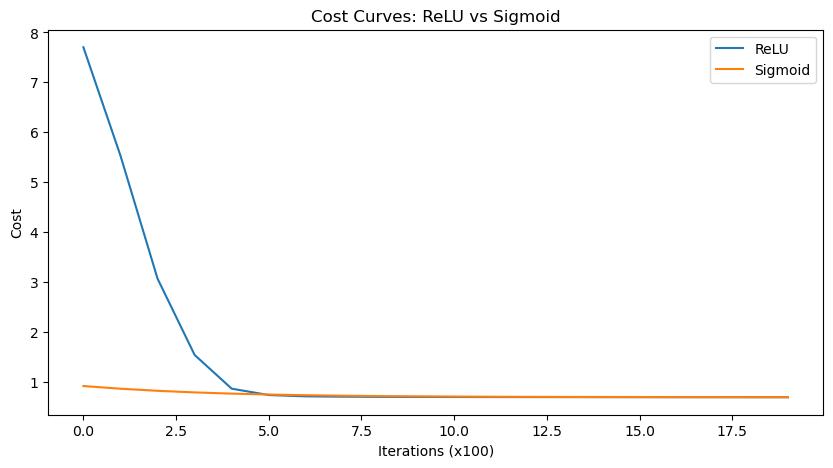

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(costs_relu, label='ReLU')
plt.plot(costs_sigmoid, label='Sigmoid')
plt.xlabel('Iterations (x100)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Curves: ReLU vs Sigmoid')
plt.show()

In [82]:
def plot_gradients(X_train, Y_train, activation_fn):
    np.random.seed(1)
    W = np.random.rand(X.shape[1])
    b = np.random.randn()
    A = forward_propagation(X_train, weights, biases, activation_fn) 
    dW, dB = backward_propagation(X_train, Y_train, A)
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(dW)
    plt.title(f'{activation_fn} - Weight Gradients')
    
    plt.show()

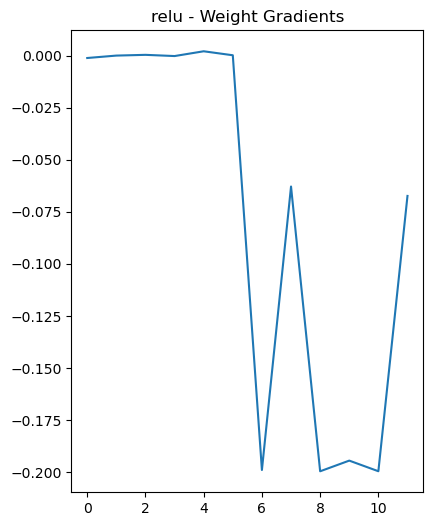

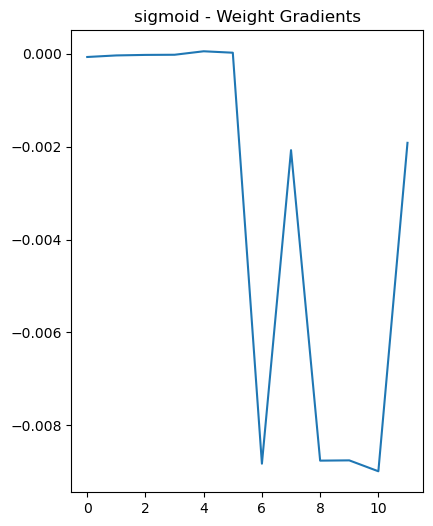

In [83]:
plot_gradients(X_train, y_train, 'relu')
plot_gradients(X_train, y_train, 'sigmoid')